# -*- coding: utf-8 -*-
#Created on Fri Oct  6 19:39:05 2017
#Ubuntu 16.4 LTS
#@author: andres

Librerias a Utilizar

In [1]:
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pprint
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
pp= pprint.PrettyPrinter()

In [3]:
document='HojaDatos' #Documento de drive a manejar
drive = False
fsheet= None 
path = os.getcwd()
path = path[:path.rfind('/')+1]

In [4]:
def move_file(origin, destiny):
    os.rename(origin, destiny)

In [5]:
def driveSheet():
    #Obtener datos de la hoja de datos
    scope = ['https://spreadsheets.google.com/feeds']
    creds = ServiceAccountCredentials.from_json_keyfile_name(path+'client_secret.json', scope)
    client = gspread.authorize(creds)
    return client.open(document)

Inicia la Funcion para obtener los datos desde google sheets o un archivo local

In [6]:
def get_data():
    #Obtener directorio del JSON con las credenciales
    df={}
    if drive:
        fsheet=driveSheet()
    #     tablas=[]
        for i in fsheet.worksheets():
#             tablas.append(i.get_all_records()) #get all shetts as a list
            df.update({i.title:pd.DataFrame(i.get_all_records())})
            pd.DataFrame(i.get_all_records()).to_pickle(document+i.title+".pk1")
            move_file(document+i.title+".pk1", 'database/'+document+i.title+".pk1")
    else:
        files = os.listdir(os.getcwd()+'/database/')

        for f in files:
            if '.pk1' in f:
                df.update({f.replace('.pk1', '').replace(document, ''):pd.read_pickle('database/'+f)})
       
    return df

In [7]:
df= get_data()

Tabla2 formatear

In [8]:
df['tabla2'].drop('n', axis=1, inplace=True)
df['tabla2'].drop('t1', axis=1, inplace=True)
df['tabla2'].drop('t2', axis=1, inplace=True)
df['tabla2'].drop('t3', axis=1, inplace=True)

Tabla3 para I=15 formatear

In [9]:
df['tabla3I0,15'].drop('n', axis=1, inplace=True)
df['tabla3I0,15'].drop('t1', axis=1, inplace=True)
df['tabla3I0,15'].drop('t2', axis=1, inplace=True)
df['tabla3I0,15'].drop('t3', axis=1, inplace=True)

Tabla3 para I=30 formatear

In [10]:
df['tabla3I0,3'].drop('n', axis=1, inplace=True)
df['tabla3I0,3'].drop('t1', axis=1, inplace=True)
df['tabla3I0,3'].drop('t2', axis=1, inplace=True)
df['tabla3I0,3'].drop('t3', axis=1, inplace=True)

Tabla 4 Formatear

In [11]:
df['tabla4n5'].drop('Frecuencia del Motor', axis=1, inplace=True)

Tabla de amplitudes

In [12]:
df['tabla1']

A_N_I0  A_N_I015  A_N_I03  A_P_I0  A_P_I015  A_P_I03
0     18.9      17.0     16.1    18.0      18.3     17.1
1     18.5      16.0     13.8    17.6      17.2     14.2
2     18.1      15.1     11.2    17.2      16.2     11.9
3     17.8      14.2      9.8    16.9      15.2     10.0
4     17.8      13.2      8.1    16.8      14.3      8.2
5     17.2      12.5      6.4    16.3      13.3      6.5
6     17.0      11.5      5.2    16.2      12.6      5.1
7     16.8      11.0      3.1    15.9      11.9      3.1
8     16.3      10.2      2.1    15.8      11.1      2.1
9     16.1       9.1      1.6    15.8      10.3      1.7
10    16.0       8.3      1.2    15.1       9.1      1.1
11    15.9       8.0      1.0    15.0       8.3      1.0
12    15.3       7.2      0.8    14.5       8.1      0.8
13    15.1       6.9      0.4    14.1       7.3      0.3
14    14.3       6.1      0.2    13.1       6.9      0.2

Tabla2 en desorden

In [13]:
df['tabla2']

Amplitud   Tprom      f0    tprom
0      18.0  1.8387  0.5439  18.3867
1      15.0  1.8377  0.5442  18.3767
2      10.0  1.8133  0.5515  18.1333

Tabla3 para I=15 en desorden

In [14]:
df['tabla3I0,15']

Amplitud   Tprom      f0    tprom
0      18.0  1.8510  0.5402  18.5100
1      15.0  1.8410  0.5432  18.4100
2      10.0  1.8307  0.5462  18.3067

Tabla3 para I=30 en desorden

In [15]:
df['tabla3I0,3']

Amplitud   Tprom      f0    tprom
0      18.0  1.8510  0.5402  18.5100
1      15.0  1.8129  0.5516  14.5033
2      10.0  1.8058  0.5538  14.4467

In [16]:
df['tabla4n5']

Amax_I0  Amax_I015  Amax_I03    F_I0  F_I015   F_I03 Posicion Dial   T_I0  \
0    0.465       0.55      0.45  0.1903  0.2110  0.2093            10  5.254   
1    0.625       1.50      1.10  0.4029  0.4177  0.3943            20  2.482   
2   18.500      14.25      1.25  0.5353  0.5302  0.6614          Raya  1.868   
3   20.170       1.55      6.85  0.6460  0.6150  0.5342            30  1.548   
4    0.400       0.40      0.60  0.8666  0.8803  0.8576            40  1.154   
5    0.200       0.40      0.30  1.0593  1.0482  1.0373            50  0.944   

   T_I015  T_I03   t_I0  t_I015  t_I03  
0   4.740  4.778  26.27   23.70  23.89  
1   2.394  2.536  12.41   11.97  12.68  
2   1.886  1.512   9.34    9.43   7.56  
3   1.626  1.872   7.74    8.13   9.36  
4   1.136  1.166   5.77    5.68   5.83  
5   0.954  0.964   4.72    4.77   4.82

Calculo de las frecuencias y periodo para cada movimiento

In [17]:
frecuencia_mov_I0 = df['tabla2'].loc[:,'f0'].mean()
periodo_mov_I0 = df['tabla2'].loc[:,'Tprom'].mean()

frecuencia_mov_I015 = df['tabla3I0,15'].loc[:,'f0'].mean()
periodo_mov_I015 = df['tabla3I0,15'].loc[:,'Tprom'].mean()

frecuencia_mov_I03 = df['tabla3I0,3'].loc[:,'f0'].mean()
periodo_mov_I03 = df['tabla3I0,3'].loc[:,'Tprom'].mean()

factor_metros =1/100

In [18]:
print ('Para I=0:\tPeriodo:\t',periodo_mov_I0,'\t\tFrecuencia:\t',frecuencia_mov_I0)
print ('Para I=0.15:\tPeriodo:\t',periodo_mov_I015,'\tFrecuencia:\t',frecuencia_mov_I015)
print ('Para I=0.30:\tPeriodo:\t',periodo_mov_I03,'\tFrecuencia:\t',frecuencia_mov_I03)

Para I=0:	Periodo:	 1.8299 		Frecuencia:	 0.5465333333333334
Para I=0.15:	Periodo:	 1.8409000000000002 	Frecuencia:	 0.5432
Para I=0.30:	Periodo:	 1.8232333333333333 	Frecuencia:	 0.5485333333333333


Calculo de las amplitudes Promedio para cada corriente

In [19]:
amplitudes_I0 = [df['tabla1'].loc[:,'A_P_I0']*factor_metros, df['tabla1'].loc[:,'A_N_I0']*factor_metros]
amplitudes_I015 = [df['tabla1'].loc[:,'A_P_I015']*factor_metros, df['tabla1'].loc[:,'A_N_I015']*factor_metros]
amplitudes_I03 = [df['tabla1'].loc[:,'A_P_I03']*factor_metros, df['tabla1'].loc[:,'A_N_I03']*factor_metros]

Intervalo de tiempo en el se evaluaran las amplitudes

In [20]:
tiempo_I0 = np.linspace(0,15*periodo_mov_I0, 15)
tiempo_I015 = np.linspace(0,15*periodo_mov_I015, 15)
tiempo_I03 = np.linspace(0,15*periodo_mov_I03, 15)

In [21]:
def tiempo_A_negativo(tiempo, periodo):
    out=[]
    for i in range(0, len(tiempo)):
        out.append(tiempo[i]+periodo/2)
    return out
#print(tiempo_A_negativo(tiempo_I0, periodo_mov_I0), tiempo_I0)

Graficar Datos de amplitudes vs tiempo

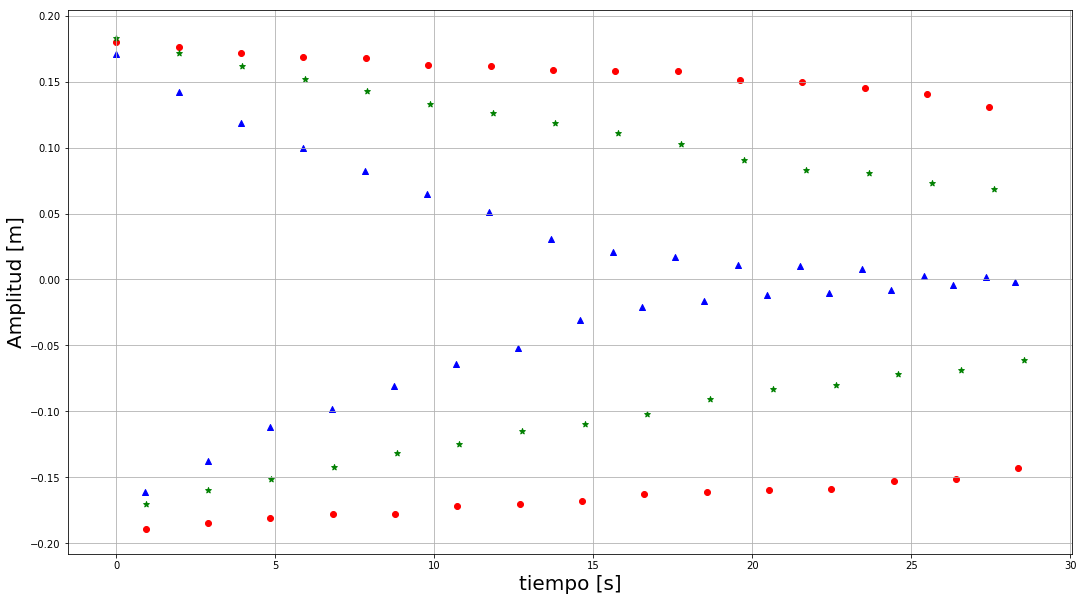

In [22]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 10)
axes.grid(True)
axes.set_xlabel('tiempo [s]', fontsize=20)
axes.set_ylabel('Amplitud [m]', fontsize=20)
axes.scatter(tiempo_I0, amplitudes_I0[0], color='r', marker='o', label='Datos para: $I=0 [A]$')
axes.scatter(tiempo_A_negativo(tiempo_I0, periodo_mov_I0), -amplitudes_I0[1], color='r', marker='o', label='')
axes.scatter(tiempo_I015, amplitudes_I015[0], color='g', marker='*', label='Datos para: $I=0.15 [A]$')
axes.scatter(tiempo_A_negativo(tiempo_I015, periodo_mov_I015), -amplitudes_I015[1], color='g', marker='*', label='')
axes.scatter(tiempo_I03, amplitudes_I03[0], color='b', marker='^', label='Datos para: $I=0.3 [A]$')
axes.scatter(tiempo_A_negativo(tiempo_I03, periodo_mov_I03), -amplitudes_I03[1], color='b', marker='^', label='')

fig

$$A(t)=Amplitud_{maxima} * e^{(-\gamma t)}$$

In [23]:
"""Modelon de la amplitud en el tiempo mov Amortiguado"""
def A_amortiguado(t, a, Gamma):
    return a*np.exp(-Gamma*t)

In [24]:
#Funcion para R cuadrado
def R_square(yydata, ydata):
    #You can get the parameters (popt) from curve_fit() with
    #popt, pcov = curve_fit(f, xdata, ydata)
    #You can get the residual sum of squares (ss_tot) with
    residuals = ydata- yydata
    ss_res = np.sum(residuals**2)
    #You can get the total sum of squares (ss_tot) with
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    #And finally, the r_squared-value with,
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Regresion lineal para I=0

In [25]:
#Utilizamos el promedio de amplitudes entre las amplitudes negativas y positivas para disminuir el error del ajuste
promedio_aplitudes_I0 = np.mean( np.array([ amplitudes_I0[0], amplitudes_I0[1] ]), axis=0 )
parametros_I0, covarianza_I0 = curve_fit(A_amortiguado, tiempo_I0, promedio_aplitudes_I0)#Ajuste de datos al modelo
imagenes_modelo_I0=A_amortiguado(tiempo_I0, parametros_I0[0], parametros_I0[1])

In [26]:
formula =r'$A(t)=%.4fe^{-%.2E*t}$' % (parametros_I0[0], parametros_I0[1])
formula
formulas_amplitudes=[]
formulas_amplitudes.append(formula)

In [27]:
modelo_amplitud_positiva_I0, =axes.plot(tiempo_I0, imagenes_modelo_I0, color='r', label=formula)
modelo_amplitud_negativa_I0, =axes.plot(tiempo_I0, -imagenes_modelo_I0, color='r', label='')
R_I0=R_square(imagenes_modelo_I0, promedio_aplitudes_I0)
fangular_I0=2*np.pi*frecuencia_mov_I0
fnatural_I0= ((fangular_I0**2)+(parametros_I0[1]**2))**(1/2)

# fig

In [28]:
#Utilizamos el promedio de amplitudes entre las amplitudes negativas y positivas para disminuir el error del ajuste

promedio_aplitudes_I015 = np.mean( np.array([ amplitudes_I015[0], amplitudes_I015[1] ]), axis=0 )
parametros_I015, covarianza_I015 = curve_fit(A_amortiguado, tiempo_I015, promedio_aplitudes_I015)#Ajuste de datos al modelo
imagenes_modelo_I015=A_amortiguado(tiempo_I015, parametros_I015[0], parametros_I015[1])

In [29]:
formula =r'$A(t)=%.4fe^{-%.2E*t}$' % (parametros_I015[0], parametros_I015[1])
formula
formulas_amplitudes.append(formula)

Regresion lineal para I=0.15

In [30]:
modelo_amplitud_positiva_I015, =axes.plot(tiempo_I015, imagenes_modelo_I015, color='g', label=formula)
modelo_amplitud_negativa_I015, =axes.plot(tiempo_A_negativo(tiempo_I015, periodo_mov_I015), -imagenes_modelo_I015, color='g', label='')
R_I015=R_square(imagenes_modelo_I015, promedio_aplitudes_I015)
fangular_I015=2*np.pi*frecuencia_mov_I015
fnatural_I015= ((fangular_I015**2)+(parametros_I015[1]**2))**(1/2)

# fig

Regresion lineal para I=0.30

In [31]:
promedio_aplitudes_I03 = np.mean( np.array([ amplitudes_I03[0], amplitudes_I03[1] ]), axis=0 )
parametros_I03, covarianza_I03 = curve_fit(A_amortiguado, tiempo_I03, promedio_aplitudes_I03)#Ajuste de datos al modelo
imagenes_modelo_I03 = A_amortiguado(tiempo_I03, parametros_I03[0], parametros_I03[1])

In [32]:
formula =r'$A(t)=%.4fe^{-%.2E*t}$' % (parametros_I03[0], parametros_I03[1])
formula
formulas_amplitudes.append(formula)

In [33]:
modelo_amplitud_positiva_I03, =axes.plot(tiempo_I03, imagenes_modelo_I03, color='b', label=formula)
modelo_amplitud_negativa_I03, =axes.plot(tiempo_I03, -imagenes_modelo_I03, color='b', label='')
R_I03=R_square(imagenes_modelo_I03, promedio_aplitudes_I03)
fangular_I03=2*np.pi*frecuencia_mov_I03
fnatural_I03= ((fangular_I03**2)+(parametros_I03[1]**2))**(1/2)

In [34]:
legend=axes.legend(loc='center left', fontsize='x-large')

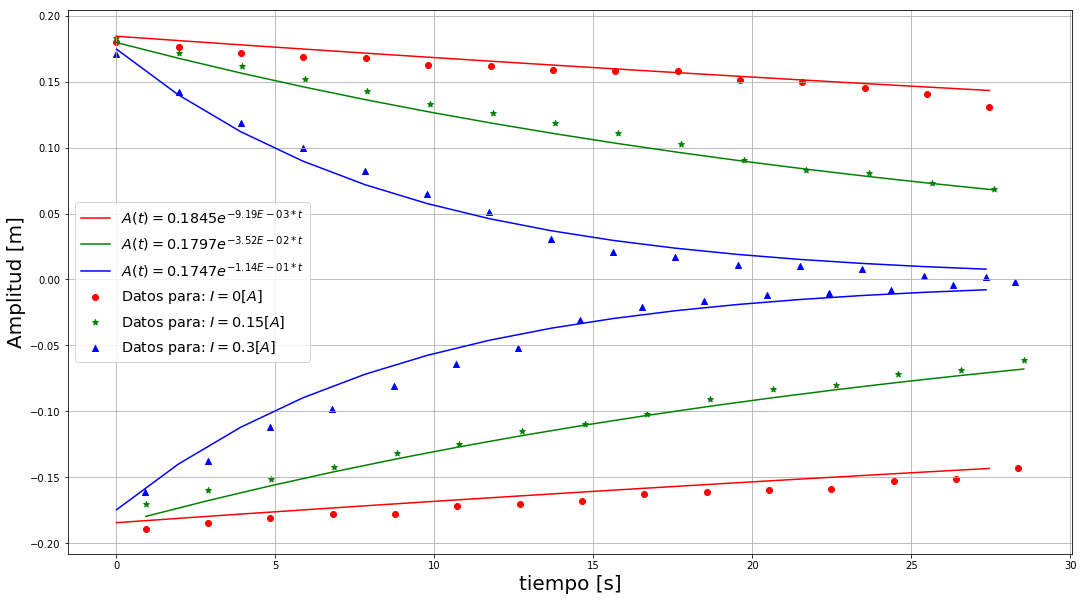

In [35]:
fig

In [36]:
fig.savefig('FiguraAmplitud.jpg', dpi=100)
plt.close(fig)

$$Y(t)=Amplitud_{maxima} * e^{(-\gamma t)}\cos{\omega t}$$

In [37]:
"""Modelon de la posicion en el tiempo mov Amortiguado"""
def Y_amortiguado(t, a, Gamma, omega):
    return A_amortiguado(t, a, Gamma)*np.cos(omega*t)

In [38]:
#legend.remove()

In [39]:
formulas_posiciones=[]
formula =r'$Y(t)=A(t)$'
formulas_posiciones.append(formula+'cos(%.4ft)' % fangular_I0)
modelo_amplitud_positiva_I0.set_label(formula+'cos(%.4ft)' % fangular_I0)
modelo_posicion_I0, =axes.plot(np.linspace(0,15*periodo_mov_I0, 300), 
          Y_amortiguado(np.linspace(0,15*periodo_mov_I0, 300), parametros_I0[0], parametros_I0[1], fangular_I0),
          color='r', label='')

formula =r'$Y(t)=A(t)$'
formulas_posiciones.append(formula+'cos(%.4ft)' % fangular_I015)
modelo_amplitud_positiva_I015.set_label(formula+'cos(%.4ft)' % fangular_I015)
modelo_posicion_I015, =axes.plot(np.linspace(0,15*periodo_mov_I015, 300), 
          Y_amortiguado(np.linspace(0,15*periodo_mov_I015, 300), parametros_I015[0], parametros_I015[1], fangular_I015),
          color='g', label='')

formula =r'$Y(t)=A(t)$'
formulas_posiciones.append(formula+'cos(%.4ft)' % fangular_I03)
modelo_amplitud_positiva_I03.set_label(formula+'cos(%.4ft)' % fangular_I03)
modelo_posicion_I03, =axes.plot(np.linspace(0,15*periodo_mov_I03, 300), 
          Y_amortiguado(np.linspace(0,15*periodo_mov_I03, 300), parametros_I03[0], parametros_I03[1], fangular_I03),
          color='b', label='')
legend=axes.legend(loc='best', fontsize='x-large')
# fig

In [40]:
fig.savefig('FiguraPosicion.jpg', dpi=100)

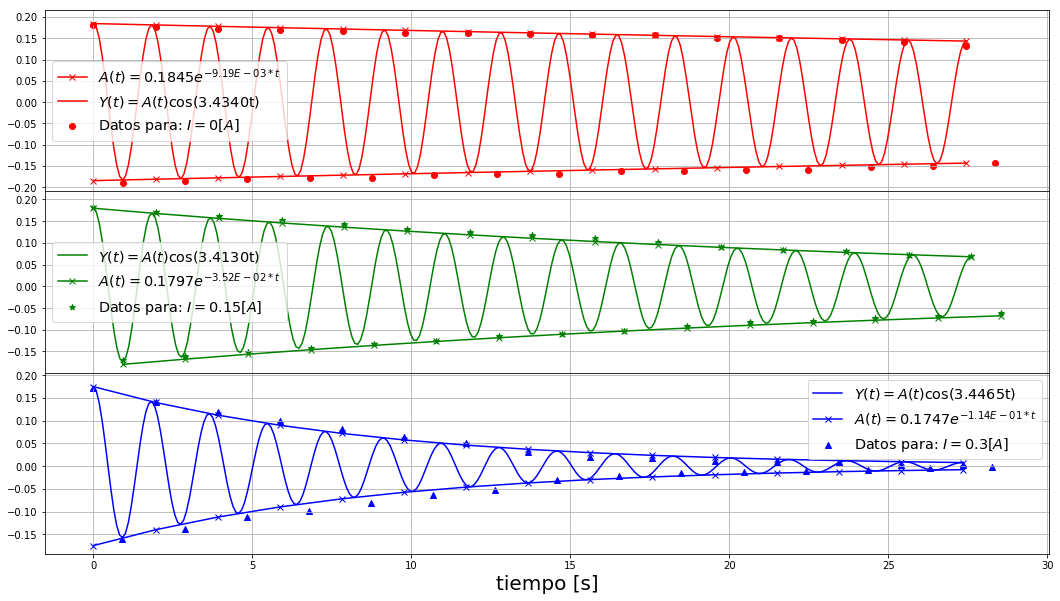

In [41]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(18, 10)
f.subplots_adjust(hspace=0)
    
axarr[2].set_xlabel('tiempo [s]', fontsize=20)
# axarr[2].set_ylabel('Amplitud [m]', fontsize=20)

axarr[0].scatter(tiempo_I0, amplitudes_I0[0], color='r', marker='o', label='Datos para: $I=0 [A]$')
axarr[0].scatter(tiempo_A_negativo(tiempo_I0, periodo_mov_I0), -amplitudes_I0[1], color='r', marker='o', label='')
axarr[1].scatter(tiempo_I015, amplitudes_I015[0], color='g', marker='*', label='Datos para: $I=0.15 [A]$')
axarr[1].scatter(tiempo_A_negativo(tiempo_I015, periodo_mov_I015), -amplitudes_I015[1], color='g', marker='*', label='')
axarr[2].scatter(tiempo_I03, amplitudes_I03[0], color='b', marker='^', label='Datos para: $I=0.3 [A]$')
axarr[2].scatter(tiempo_A_negativo(tiempo_I03, periodo_mov_I03), -amplitudes_I03[1], color='b', marker='^', label='')

axarr[0].plot(modelo_amplitud_positiva_I0.get_data()[0], modelo_amplitud_positiva_I0.get_data()[1], 
              color=modelo_amplitud_positiva_I0.get_color(), marker='x', 
              label=formulas_amplitudes[0])

axarr[0].plot(modelo_amplitud_negativa_I0.get_data()[0], modelo_amplitud_negativa_I0.get_data()[1], 
              color=modelo_amplitud_negativa_I0.get_color(), marker='x', 
              label=modelo_amplitud_negativa_I0.get_label())

axarr[0].plot(modelo_posicion_I0.get_data()[0], modelo_posicion_I0.get_data()[1], 
              color=modelo_posicion_I0.get_color(), marker=modelo_posicion_I0.get_marker(), 
              label=formulas_posiciones[0])

axarr[1].plot(modelo_posicion_I015.get_data()[0], modelo_posicion_I015.get_data()[1], 
              color=modelo_posicion_I015.get_color(), marker=modelo_posicion_I015.get_marker(), 
              label=formulas_posiciones[1])

axarr[1].plot(modelo_amplitud_positiva_I015.get_data()[0], modelo_amplitud_positiva_I015.get_data()[1], 
              color=modelo_amplitud_positiva_I015.get_color(), marker='x', 
              label=formulas_amplitudes[1])

axarr[1].plot(modelo_amplitud_negativa_I015.get_data()[0], modelo_amplitud_negativa_I015.get_data()[1], 
              color=modelo_amplitud_negativa_I015.get_color(), marker='x', 
              label=modelo_amplitud_negativa_I015.get_label())

axarr[2].plot(modelo_posicion_I03.get_data()[0], modelo_posicion_I03.get_data()[1], 
              color=modelo_posicion_I03.get_color(), marker=modelo_posicion_I03.get_marker(), 
              label=formulas_posiciones[2])

axarr[2].plot(modelo_amplitud_positiva_I03.get_data()[0], modelo_amplitud_positiva_I03.get_data()[1], 
              color=modelo_amplitud_positiva_I03.get_color(), marker='x', 
              label=formulas_amplitudes[2])

axarr[2].plot(modelo_amplitud_negativa_I03.get_data()[0], modelo_amplitud_negativa_I03.get_data()[1], 
              color=modelo_amplitud_negativa_I03.get_color(), marker='x', 
              label=modelo_amplitud_negativa_I03.get_label())

for axes in axarr:
    axes.grid(True)
    legend=axes.legend(loc='best', fontsize='x-large')

f

In [42]:
f.savefig('FiguraPosicionSeparada.jpg', dpi=100)
plt.close(f)

Datos de Gamma para cada Regresion

Tabla de constantes y estadistica #tablaCons=[R_square, A_maxima, Gamma, Frecuencia, Periodo]

In [43]:
tablaCons=[]
tablaCons.append([R_I0, parametros_I0[0], parametros_I0[1], 
                  parametros_I0[1]**2,frecuencia_mov_I0, 
                  periodo_mov_I0, fangular_I0, fnatural_I0, fnatural_I0**2])

tablaCons.append([R_I015, parametros_I015[0], parametros_I015[1],
                  parametros_I015[1]**2,frecuencia_mov_I015,
                  periodo_mov_I015, fangular_I015, fnatural_I015, fnatural_I015**2] )

tablaCons.append([R_I03, parametros_I03[0], parametros_I03[1],
                  parametros_I03[1]**2 ,frecuencia_mov_I03,
                  periodo_mov_I03, fangular_I03, fnatural_I03, fnatural_I03**2] )


In [44]:
tablaConsFormat=[]
tablaConsFormat.append(['R cuadrado', 'A_max[m]', 'Gamma', 'Gamma^2', 'Frecuencia', 'Periodo', 'fAngular', 'fNatural', 'fNatural^2'])
for i in tablaCons:
    temp = [ '%.4f' % elem for elem in i ]
    tablaConsFormat.append(temp)
for i in tablaConsFormat: print(i)

['R cuadrado', 'A_max[m]', 'Gamma', 'Gamma^2', 'Frecuencia', 'Periodo', 'fAngular', 'fNatural', 'fNatural^2']
['0.9726', '0.1845', '0.0092', '0.0001', '0.5465', '1.8299', '3.4340', '3.4340', '11.7922']
['0.9956', '0.1797', '0.0352', '0.0012', '0.5432', '1.8409', '3.4130', '3.4132', '11.6500']
['0.9834', '0.1747', '0.1136', '0.0129', '0.5485', '1.8232', '3.4465', '3.4484', '11.8915']


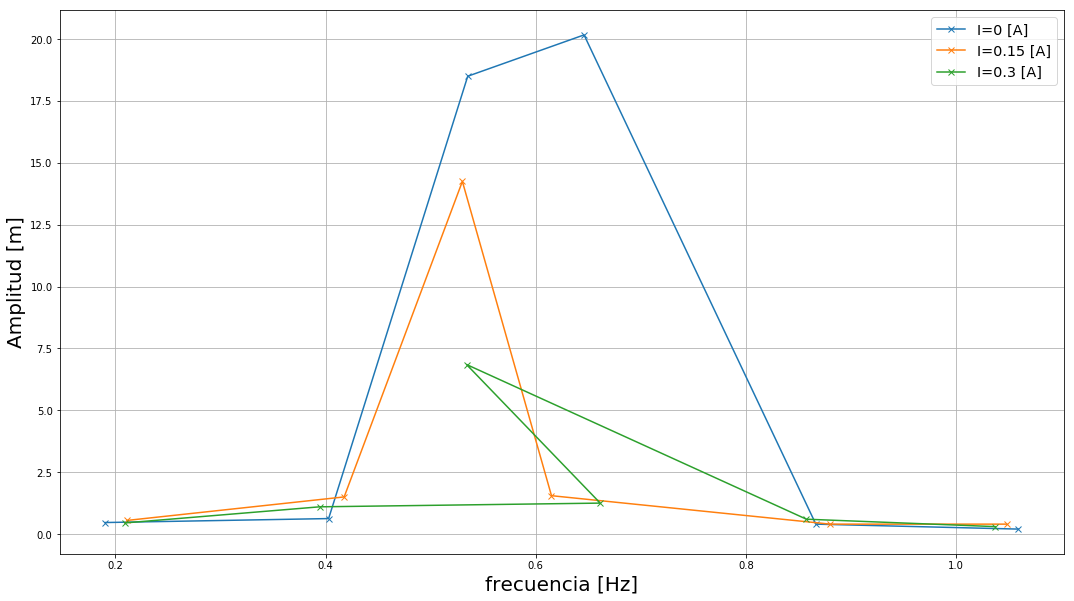

In [45]:
df['tabla4n5']
fig3, axes3 = plt.subplots()
fig3.set_size_inches(18, 10)
axes3.grid(True)
axes3.set_xlabel('frecuencia [Hz]', fontsize=20)
axes3.set_ylabel('Amplitud [m]', fontsize=20)
axes3.plot(df['tabla4n5'].loc[:,'F_I0'], df['tabla4n5'].loc[:,'Amax_I0'], label='I=0 [A]', marker='x')
axes3.plot(df['tabla4n5'].loc[:,'F_I015'], df['tabla4n5'].loc[:,'Amax_I015'], label='I=0.15 [A]', marker='x')
axes3.plot(df['tabla4n5'].loc[:,'F_I03'], df['tabla4n5'].loc[:,'Amax_I03'], label='I=0.3 [A]', marker='x')
axes3.grid(True)
legend=axes3.legend(loc='best', fontsize='x-large')
fig3

In [51]:
fig3.savefig('FiguraFrecuenciaVsAmplitud.jpg', dpi=100)
plt.close(fig3)
f2natural_I0= (((2*np.pi*0.6460)**2)+(parametros_I015[1]**2))**(1/2)
f2natural_I015= (((2*np.pi*0.5302)**2)+(parametros_I015[1]**2))**(1/2)
f2natural_I03= (((2*np.pi*0.5342)**2)+(parametros_I015[1]**2))**(1/2)
f2natural=[f2natural_I0, f2natural_I015, f2natural_I03]
f2natural

[4.0590906826533644, 3.331531233195355, 3.3566625788941722]

Nueva Hoja para guardar una tabla relevante

In [47]:
def crear_hoja(nombre, lista, intervalo):
    fsheet=driveSheet()
    resultsSheet = fsheet.add_worksheet(title=nombre, rows="100", cols="20")
#     resultsSheet=fsheet.get_worksheet(-1)
    cell_list = resultsSheet.range(intervalo) #'A1:B2'
    for cell in cell_list:
        cell.value=tablaConsFormat[cell.row-1][cell.col-1]

    # Update in batch
    resultsSheet.update_cells(cell_list)

In [48]:
# crear_hoja('result', tablaConsFormat, 'A1:I4')

#Finale